In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import umap.plot
from sentence_transformers import util

from core.ranking_model import Ranker
from core.config import load_config
from matplotlib import colormaps as cm

plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=14)

In [82]:
PATH_TO_CONFIG = "config.yaml"
config = load_config(PATH_TO_CONFIG)

username = "geometrykanal"

In [36]:
ranker = Ranker(config=config)

In [37]:
cosine_similarities = ranker.distance_func(ranker.emb)

In [51]:
mapper = umap.UMAP(n_neighbors=100, metric='cosine', verbose=True)
pos = mapper.fit_transform(ranker.emb)

UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=100, verbose=True)
Wed Dec 22 01:44:13 2021 Construct fuzzy simplicial set
Wed Dec 22 01:44:13 2021 Finding Nearest Neighbors
Wed Dec 22 01:44:13 2021 Building RP forest with 11 trees
Wed Dec 22 01:44:13 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Wed Dec 22 01:44:23 2021 Finished Nearest Neighbor Search
Wed Dec 22 01:44:24 2021 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:07]

Wed Dec 22 01:44:32 2021 Finished embedding


In [39]:
communities = util.community_detection(
    ranker.emb,
    threshold=0.85,
    min_community_size=200,
    init_max_size=5000,
)

In [40]:
len(communities)

8

In [41]:
labels = np.zeros(len(ranker.emb)).astype(np.int8)
for i in range(len(communities)):
    com = communities[i]
    labels[com] = i

In [42]:
len(communities)

8

In [111]:
com_id2label = {
    0: "Остальное",
    1: "Английский сегмент",
    2: "Узбекский сегмент",
    3: "Психология, саморазвитие и др.",
    4: "Инвестиции и финансы",
    5: "Работа и образование",
    6: "Новости и политика",
    7: "Спорт",
}

In [112]:
c_map = cm.get("tab10")

In [113]:
label_names = [com_id2label[x] for x in labels]

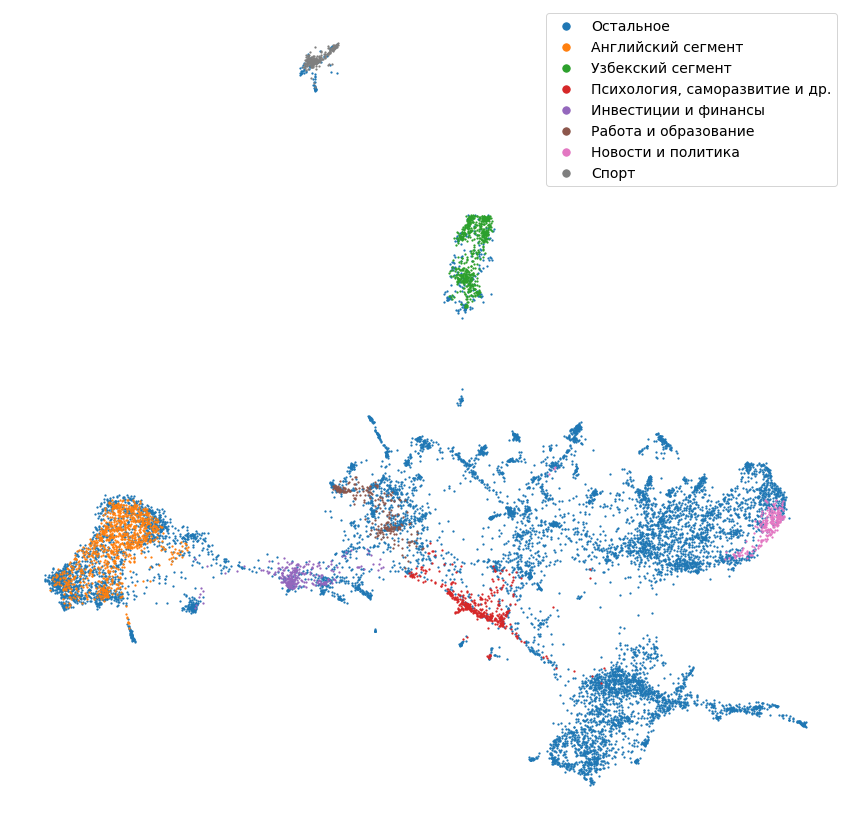

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for label_name_index, label_name in com_id2label.items():
    loc_pos = pos[labels == label_name_index]
    ax.scatter(loc_pos[:, 0], loc_pos[:, 1], s=1.5, color=c_map(label_name_index), label=label_name)
# umap.plot.points(mapper, labels, theme="blue", ax=ax)
# ax.set_title("Кластеризация каналов на основе текстовых описаний", fontdict={"color": "black"})
ax.set_axis_off()
ax.legend(markerscale=6)
fig.savefig("./images/communities.jpg", dpi=600, bbox_inches="tight")
plt.show()

In [116]:
channel_info = pd.DataFrame({"channel_id": ranker.chan_ids, "labels": label_names, "pos_x": pos[:, 0], "pos_y": pos[:, 1]})

In [118]:
channel_info.to_csv("./data/channel_community.csv", encoding="utf-8", index=False)

In [115]:
i = 1
ch_indexes = [ranker.chan_ids[x] for x in communities[i]]

ranker.meta[ranker.meta.channel_id.isin(ch_indexes)][["title", "about", "link"]].sample(30)

,title,about,link
15529,MaticPad,MaticPad is the First Cross-Chain Decentralize...,MaticPad
15822,Crypto Expert Channel,Master the art of virality and boost your cryp...,CryptoExpert_ann
12828,Phuture Official,A decentralised protocol built for the creatio...,phuture_group
14943,GameStation Announcements,The official announcement channel of GameStati...,GameStationIO_Ann
7825,Glimpse Official,Social media w/ NFT's\n\nALL OFFICIAL accounts...,glimpsetoken
15151,Gacrux.io NFT Marketplace Discussion,The New Address of Cinema and Art.,gacruxio
8380,GenZ Capital🐸 | Announcements,🐸 GenZ Capital - Alt Coin Discussion\n🐸 Fresh ...,GenZCapital_News
14723,GEM Detectors 💎,Let's discover new gem 💎 \n\nPartnerships\n▪️B...,gemdetectors
15019,Wallet Pay Official,Wallet and payments\nWebsite: https://walletpa...,WalletPayOfficial
13143,Shin Chan ICO/IEO Community 🔱 | 小新交流群 🔱,"IEO hunter, Project analyst, Project reviewer,...",ShinChanEG_IEO
